# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1

Use the Monte Carlo NVT code we have provided to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, and pressure, $P$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ and $P$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ and $P$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
import numpy as np
import math

In [2]:
def PlotEquilibration(x,y1,y2,xtext,y1text,y2text,title1,title2,y_dow1,y_up1,y_dow2,y_up2):
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2,figsize=(16,5))
    
    font = FontProperties()
    font.set_name('Times New Roman')
    
    ax0.plot(x,y1, linewidth = 0.7)
    ax0.set_title('\n'+title1, color='C0', fontsize=14)
    ax0.set_ylabel(y1text,fontproperties=font)
    ax0.set_xlabel(xtext,fontproperties=font)
    ax0.set_ylim(y_dow1,y_up1)
    ax0.grid(alpha=0.4)
    
    ax1.plot(x,y2, linewidth = 0.7)
    ax1.set_title('\n'+title2, color='C0', fontsize=14)
    ax1.set_ylabel(y2text,fontproperties=font)
    ax1.set_xlabel(xtext,fontproperties=font)
    ax1.set_ylim(y_dow2,y_up2)
    ax1.grid(alpha=0.4)

    fig.tight_layout()
    plt.show()

In [3]:
def autocorr(v,l):
    M=len(v)
    sum=0
    for i in range(M):
        sum+=v[i]
    ave=sum/M

    num=0
    den=0
    
    for i in range(M-l):
        num+=(v[i]-ave)*(v[i+l]-ave)
    for i in range(M):
        den+=(v[i]-ave)**2
    
    return(np.sqrt((num/den)**2)) # modulo di num/den

In [4]:
def plot_autocorr(ve,vp,phase):

    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2,figsize=(16,5))
    
    font = FontProperties()
    font.set_name('Times New Roman')
    
    ax0.plot(ve,color='red')
    ax0.set_title('\n '+phase+'  - Autocorrelation for U / N', color='C0', fontsize=14)
    ax0.set_ylabel('Ac',fontproperties=font)
    ax0.set_xlabel('steps',fontproperties=font)
    ax0.grid(alpha=0.4)

    ax1.plot(vp,color='red')
    ax1.set_title('\n '+phase+'  - Autocorrelation for PRESSURE', color='C0', fontsize=14)
    ax1.set_ylabel('Ac',fontproperties=font)
    ax1.set_xlabel('steps',fontproperties=font)
    ax1.grid(alpha=0.4)

    fig.tight_layout()
    plt.show()

In [5]:
def statistical_uncertainties(E,P,phase,y_dow1,y_up1,y_dow2,y_up2):    
    # calcolo il valore dell'incertezza al variare della lunghezza L del blocco
    M=len(E)
    C=500
    L_min=10         # lunghezza minima del blocco 

    err_E=np.zeros(C)
    err_P=np.zeros(C)

    for l in range(C):
        n=l+1
        L=n*L_min
        N=int(M/L)

        ave_tot_E=0
        av2_tot_E=0
        ave_tot_P=0
        av2_tot_P=0

        for j in range(N):

            sum_E=0
            sum_P=0
            for k in range(L):
                i=j*L+k
                sum_E+=E[i]
                sum_P+=P[i]
            ave_tot_E+=sum_E/L
            av2_tot_E+=(sum_E/L)**2
            ave_tot_P+=sum_P/L
            av2_tot_P+=(sum_P/L)**2

        ave_tot_E/=N
        av2_tot_E/=N
        err_E[l]=math.sqrt((av2_tot_E-ave_tot_E**2)/N)
        ave_tot_P/=N
        av2_tot_P/=N
        err_P[l]=math.sqrt((av2_tot_P-ave_tot_P**2)/N)
        
    X=np.arange(C)
    X*=L_min
    
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2,figsize=(16,5))
    
    font = FontProperties()
    font.set_name('Times New Roman')
    
    ax0.plot(X,err_E, linewidth = 0.7)
    ax0.set_title('\n'+phase+' - statistical uncertainties of U/N for different size of the blocks', color='C0', fontsize=14)
    ax0.set_ylabel('U / N  statistical uncertainty',fontproperties=font)
    ax0.set_xlabel('size of the block [# steps]',fontproperties=font)
    ax0.set_ylim(y_dow1,y_up1)
    ax0.grid(alpha=0.4)
    
    ax1.plot(X,err_P, linewidth = 0.7)
    ax1.set_title('\n'+phase+' - statistical uncertainties of P for different size of the blocks', color='C0', fontsize=14)
    ax1.set_ylabel('\n P  statistical uncertainty',fontproperties=font)
    ax1.set_xlabel('size of the block [# steps]',fontproperties=font)
    ax1.set_ylim(y_dow2,y_up2)
    ax1.grid(alpha=0.4)

    fig.tight_layout()
    plt.show()

## <font face = "Tahoma" style="color:black">Exercise 07.1</font>

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    <br>
    Per prima cosa cerco di settare l'accettazione delle simulazioni al $50\%$ circa, variando manualmente il valore di <b><i>delta</i></b> nel file <font face="Courier">input.dat</font>. 
    <br>Ci riesco per solido e liquido, usando <b> $\delta_{solido}=0.11246$ </b> e <b>$\delta_{liquido}=0.205005$</b>. Per quanto riguarda il gas, l'accettazione non scende mai sotto il $60\%$ al variare di <i>delta</i>; scelgo quella ottimale per <b>$\delta_{gas}=9.3$</b>.
    <br><br>
    </p>

### <font face = "Tahoma" style="color:teal"><b>Equilibrazioni</b></font>

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Per ognuna delle tre fasi svolgo una simulazione di alcuni steps per equilibrare il sistema, stampando i valori istantanei delle osservabili. 
    </p>

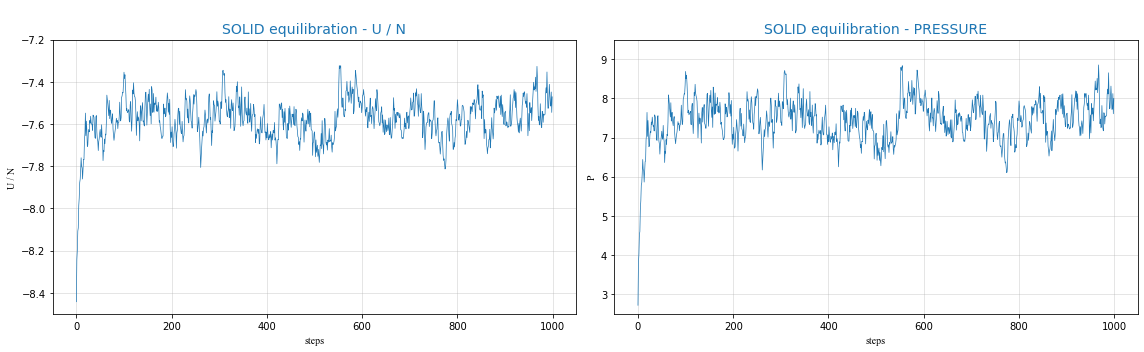

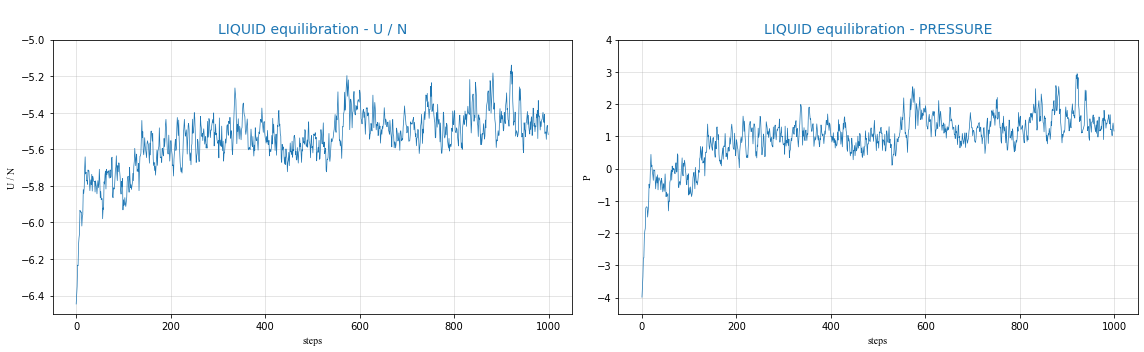

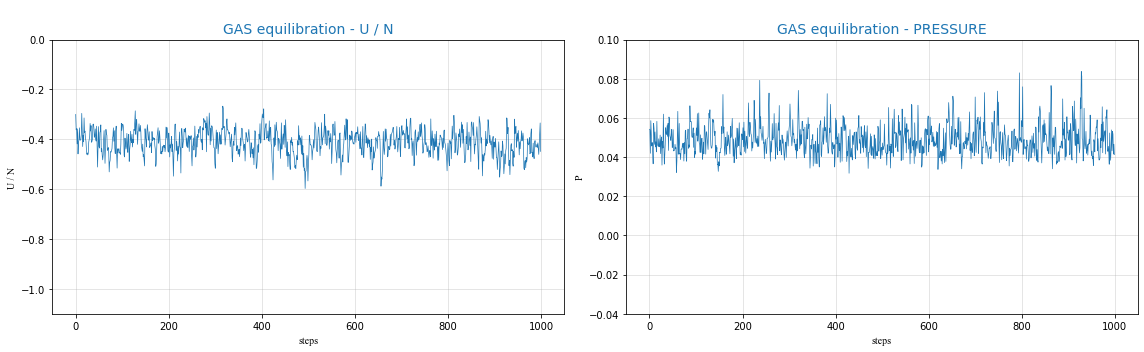

In [6]:
epot_s = np.loadtxt(fname='Lecture07/Esercizio1/01_solid/Equilibration/output_instant_epot.dat')
pres_s = np.loadtxt(fname='Lecture07/Esercizio1/01_solid/Equilibration/output_instant_pres.dat')
M=len(epot_s)
x=np.arange(M)
PlotEquilibration(x,epot_s,pres_s,'steps','U / N','P','SOLID equilibration - U / N','SOLID equilibration - PRESSURE',-8.5,-7.2,2.5,9.5)

epot_l = np.loadtxt(fname='Lecture07/Esercizio1/02_liquid/Equilibration/output_instant_epot.dat')
pres_l = np.loadtxt(fname='Lecture07/Esercizio1/02_liquid/Equilibration/output_instant_pres.dat')
M=len(epot_l)
x=np.arange(M)
PlotEquilibration(x,epot_l,pres_l,'steps','U / N','P','LIQUID equilibration - U / N','LIQUID equilibration - PRESSURE',-6.5,-5.,-4.5,4)

epot_g = np.loadtxt(fname='Lecture07/Esercizio1/03_gas/Equilibration/output_instant_epot.dat')
pres_g = np.loadtxt(fname='Lecture07/Esercizio1/03_gas/Equilibration/output_instant_pres.dat')
M=len(epot_g)
x=np.arange(M)
PlotEquilibration(x,epot_g,pres_g,'steps','U / N','P','GAS equilibration - U / N','GAS equilibration - PRESSURE',-1.1,0,-0.04,0.1)


<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Per equilibrare il gas, anzichè utilizzare come input la configurazione fcc, uso la configurazione finale dell'equilibrazione del liquido. Noto che il gas equilibra molto più velocemente rispetto a liquido e solido.
    </p>

### <font face = "Tahoma" style="color:teal"><b>Autocorrelazione</b></font>

In [8]:
e_s = np.loadtxt(fname='Lecture07/Esercizio1/01_solid/Simulation/output_instant_epot.dat')

Ac_e_s=np.zeros(500)
for i in range(500):
    Ac_e_s[i]=autocorr(e_s,i)

In [9]:
p_s = np.loadtxt(fname='Lecture07/Esercizio1/01_solid/Simulation/output_instant_pres.dat')

Ac_p_s=np.zeros(500)
for i in range(500):
    Ac_p_s[i]=autocorr(p_s,i)

In [10]:
e_l = np.loadtxt(fname='Lecture07/Esercizio1/02_liquid/Simulation/output_instant_epot.dat')

Ac_e_l=np.zeros(500)
for i in range(500):
    Ac_e_l[i]=autocorr(e_l,i)

In [18]:
p_l = np.loadtxt(fname='Lecture07/Esercizio1/02_liquid/Simulation/output_instant_pres.dat')

Ac_p_l=np.zeros(500)
for i in range(500):
    Ac_p_l[i]=autocorr(p_l,i)

In [19]:
e_g = np.loadtxt(fname='Lecture07/Esercizio1/03_gas/Simulation/output_instant_epot.dat')

Ac_e_g=np.zeros(500)
for i in range(500):
    Ac_e_g[i]=autocorr(e_g,i)

In [20]:
p_g = np.loadtxt(fname='Lecture07/Esercizio1/03_gas/Simulation/output_instant_pres.dat')

Ac_p_g=np.zeros(500)
for i in range(500):
    Ac_p_g[i]=autocorr(p_g,i)

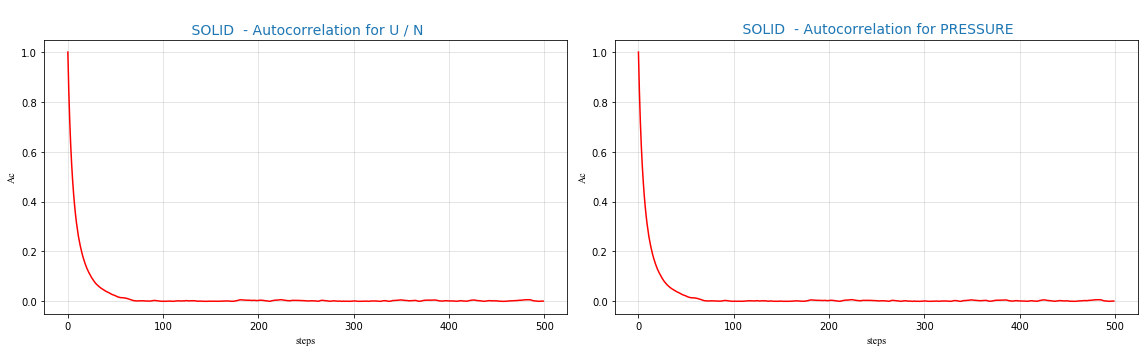

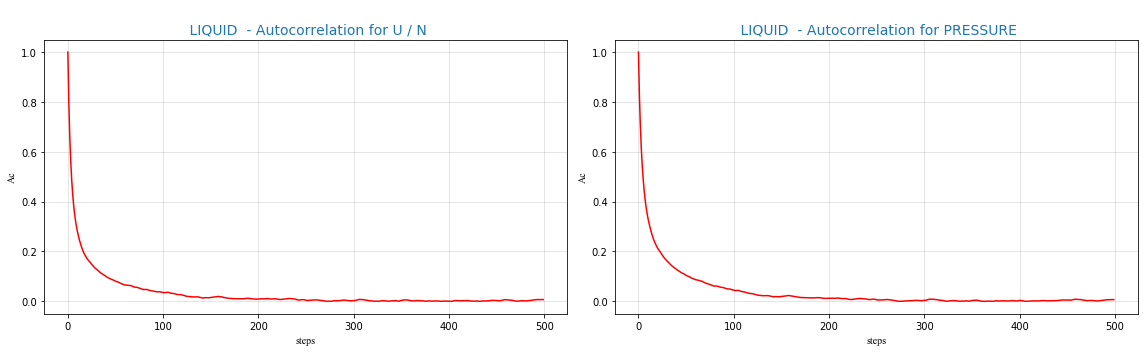

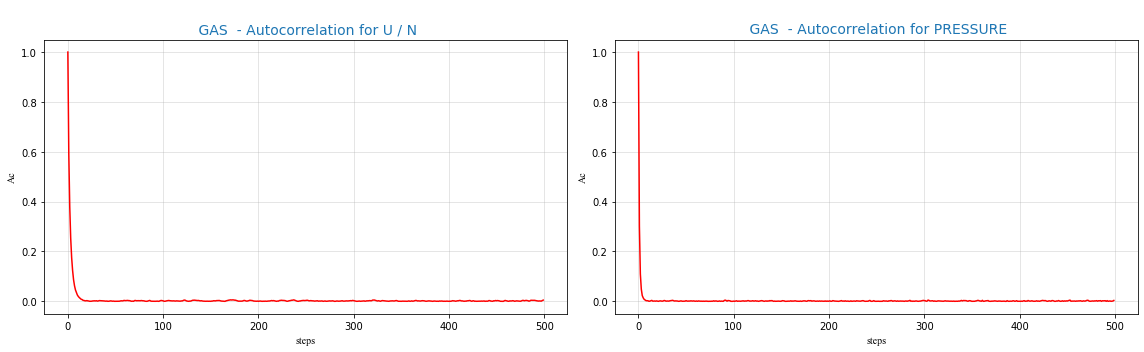

In [21]:
plot_autocorr(Ac_e_s,Ac_p_s,'SOLID')
plot_autocorr(Ac_e_l,Ac_p_l,'LIQUID')
plot_autocorr(Ac_e_g,Ac_p_g,'GAS')

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Il grafico dell'autocorrelazione ha l'andamento un'esponenziale decrescente per tutte e tre le fasi. L'informazione che il grafico dà è il numero minimo di steps per blocco affinchè le misure siano scorrelate: a tale scopo dovrei usare blocchi larghi il doppio rispetto allo step a cui l'autocorrelazione inizia a tendere a zero.
    <br><br><u>Osservazioni sull'autocorrelazioine per le $3$ fasi</u>:
    <br><br>
    <b>Solido: </b> $\delta_{solido}=0.11246$ e $A\approx\%50$.
    <br>$Ac$ va a zero dopo circa $80$ steps.
    <br><br>
    <b>Liquido: </b> $\delta_{liquido}=0.205005$ e $A\approx\%50$.
    <br>$Ac$ va a zero dopo circa $250$ steps.
    <br><br>
    <b>Gas: </b> $\delta_{gas}=9.3$ e $A\approx\%60$.
    <br>$Ac$ va a zero dopo circa $20$ steps. Siccome il gas ha una densità ancor minore rispetto a quella del liquido mi aspetterei che si scorreli per ultimo, ma, siccome l'accettazione non scende mai sotto il $60\%$, il gas è portato a cambiare più velocemente configurazione. Questo lo porta a scorrelarsi rapidamente.

### <font face = "Tahoma" style="color:teal"><b>Incertezze statistiche in funzione della lunghezza dei blocchi</b></font>

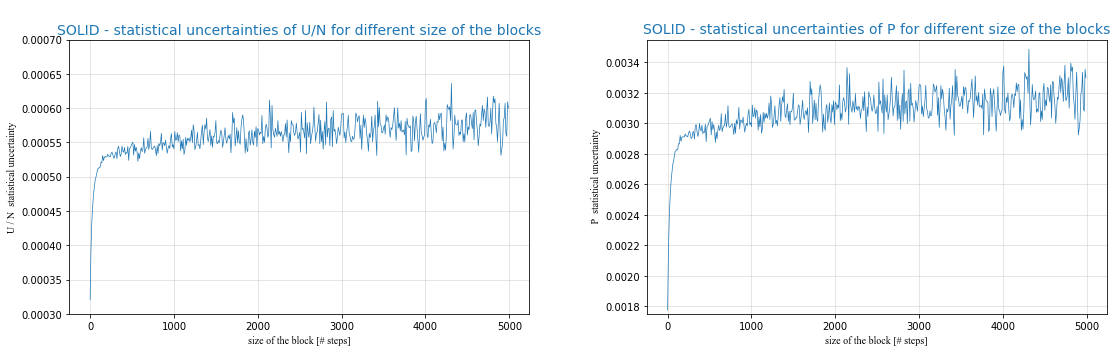

In [22]:
e_s = np.loadtxt(fname='Lecture07/Esercizio1/01_solid/Simulation/output_instant_epot.dat')
p_s = np.loadtxt(fname='Lecture07/Esercizio1/01_solid/Simulation/output_instant_pres.dat')
statistical_uncertainties(e_s,p_s,'SOLID',0.0003,0.0007,0.00175,0.00355)

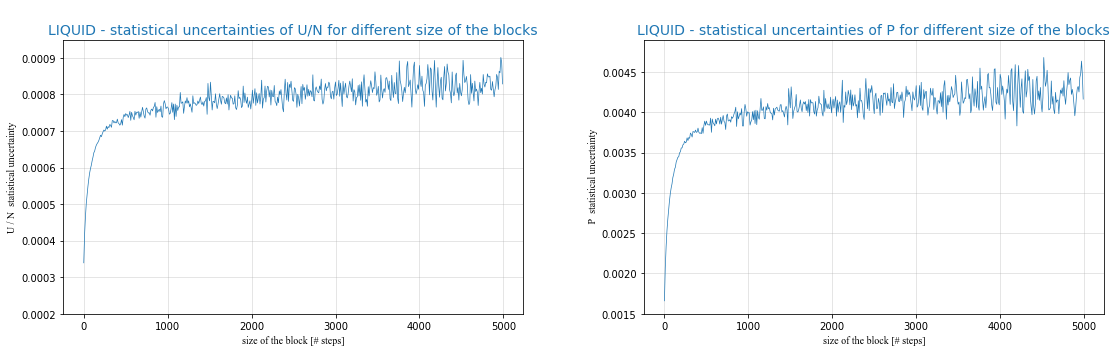

In [23]:
e_l = np.loadtxt(fname='Lecture07/Esercizio1/02_liquid/Simulation/output_instant_epot.dat')
p_l = np.loadtxt(fname='Lecture07/Esercizio1/02_liquid/Simulation/output_instant_pres.dat')
statistical_uncertainties(e_l,p_l,'LIQUID',0.0002,0.00095,0.0015,0.0049)

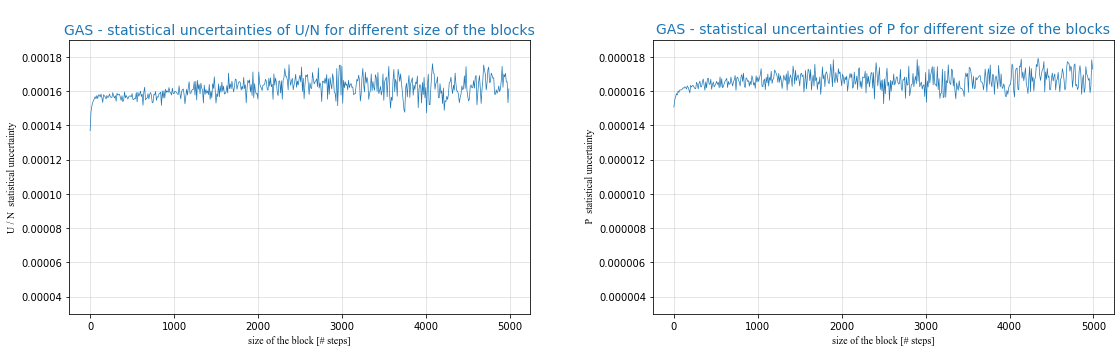

In [24]:
e_g = np.loadtxt(fname='Lecture07/Esercizio1/03_gas/Simulation/output_instant_epot.dat')
p_g = np.loadtxt(fname='Lecture07/Esercizio1/03_gas/Simulation/output_instant_pres.dat')

statistical_uncertainties(e_g,p_g,'GAS',0.00003,0.00019,0.000003,0.000019)

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    All'aumentare della lunghezza del blocco l'incertezza aumenta fino ad arrivare a un valore di saturazione. Un blocco diventa sufficientemente lungo a livello statistico quando l'incertezza raggiunge tale saturazione; in questa situazione le misure si possono considerare scorrelate.
    <br>Analogamente all'autocorrelazione, anche qui il gas satura dopo pochi steps, il secondo a saturare è il solido, mentre il liquido impiega più steps.
    </p>
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    E' da notare che, nonostante si arrivi a una certa saturazione, all'aumentare della lunghezza del blocco, l'incertezza tende a fluttuare di più e a crescere - seppur limitatamente. Credo che questo sia dovuto al fatto che aumentando la grandezza dei blocchi su un set finito di dati, ne diminuisce il numero; questo porta ad avere un numero meno adeguato di medie di blocco con cui calcolare le incertezze, che per questo fluttuano maggiormente.
    </p>

### Exercise 07.2

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the Monte Carlo NVT code</span> we have provided: average value of $g(r)$ in each block (with output in the file: output.gofr.0), final average value of $g(r)$ with statistical uncertainties (with output in the file: output.gave.0).

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Il codice è situato nella cartella <font face="Courier">/Lecture07/MonteCarlo_NVT</font>.

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, inside the previously used Molecular Dynamics code</span>.

In [6]:
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

def CompareGofr(x,y,err,x2,y2,err2,phase):
    fig, ax = plt.subplots(figsize=(12,5))
    
    ax.set_title('Comparison between NVE g(r) and NVT g(r)  - '+phase, color='C0', fontsize=14)
    
    p1 = ax.fill_between(x, y - err, y + err, alpha=1., label='NVE',color='lightblue')
    p2 = ax.errorbar(x, y, yerr=err, linewidth = 0.5,color='b')
    
    p3 = ax.fill_between(x2,y2 - err2, y2 + err2, alpha=0.8, label='NVT',color='orange')
    p4 = ax.errorbar(x2, y2, yerr=err2, linewidth = 0.5, color='black')
    
    plt.xlabel('r')
    plt.ylabel('g(r)')
    
    legend = plt.legend([(p1, p2),(p3,p4)], ['NVE','NVT'], numpoints=2,
               handler_map={tuple: HandlerTuple(ndivide=None)}, fontsize='xx-large',loc='upper right')
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')
    
    fig.tight_layout()
    plt.grid(alpha=0.4)
    plt.show()

## <font face = "Tahoma" style="color:teal"><b>Argon - fase solida:</b></font>

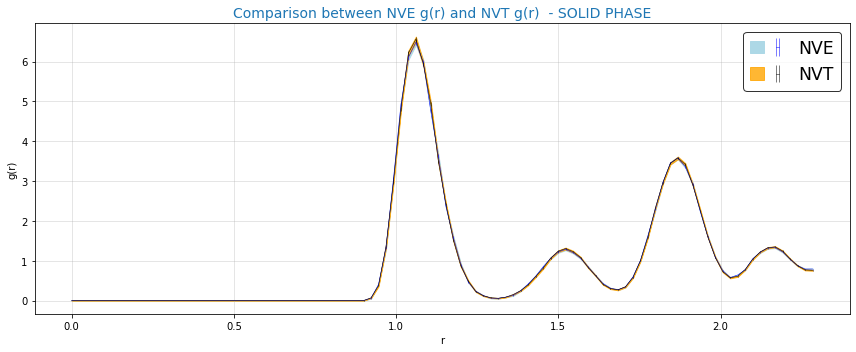

In [7]:
r_s4 = np.loadtxt(fname='Lecture04/Esercizio3/01_solid/gofr_solid/output.gave.0',usecols=0)
gav_s4 = np.loadtxt(fname='Lecture04/Esercizio3/01_solid/gofr_solid/output.gave.0',usecols=1)
err_gav_s4 = np.loadtxt(fname='Lecture04/Esercizio3/01_solid/gofr_solid/output.gave.0',usecols=2)

r_s = np.loadtxt(fname='Lecture07/Esercizio3/01Solid/output.gave.0',usecols=0)
gav_s = np.loadtxt(fname='Lecture07/Esercizio3/01Solid/output.gave.0',usecols=1)
err_gav_s = np.loadtxt(fname='Lecture07/Esercizio3/01Solid/output.gave.0',usecols=2)

CompareGofr(r_s4,gav_s4,err_gav_s4,r_s,gav_s,err_gav_s,'SOLID PHASE')

## <font face = "Tahoma" style="color:teal"><b>Argon - fase liquida:</b></font>

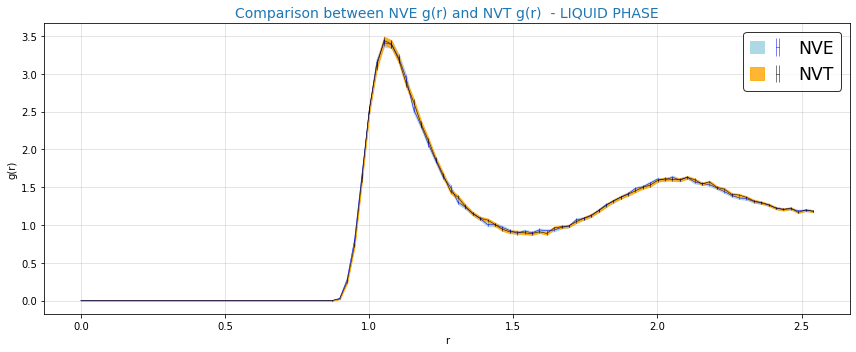

In [8]:
r_l4 = np.loadtxt(fname='Lecture04/Esercizio3/02_liquid/gofr_liquid/output.gave.0',usecols=0)#-0.12
gav_l4 = np.loadtxt(fname='Lecture04/Esercizio3/02_liquid/gofr_liquid/output.gave.0',usecols=1)#*1.1
err_gav_l4 = np.loadtxt(fname='Lecture04/Esercizio3/02_liquid/gofr_liquid/output.gave.0',usecols=2)

r_l = np.loadtxt(fname='Lecture07/Esercizio3/02Liquid/output.gave.0',usecols=0)
gav_l = np.loadtxt(fname='Lecture07/Esercizio3/02Liquid/output.gave.0',usecols=1)
err_gav_l = np.loadtxt(fname='Lecture07/Esercizio3/02Liquid/output.gave.0',usecols=2)

CompareGofr(r_l4,gav_l4,err_gav_l4,r_l,gav_l,err_gav_l,'LIQUID PHASE')

## <font face = "Tahoma" style="color:teal"><b>Argon - fase gassosa:</b></font>

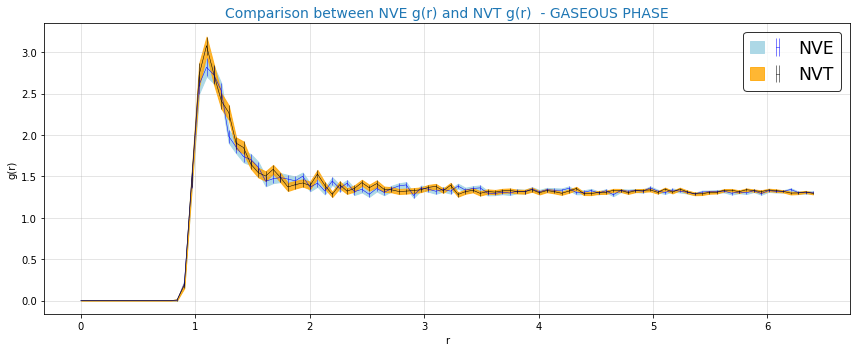

In [9]:
r_g4 = np.loadtxt(fname='Lecture04/Esercizio3/03_gas/gofr_gas/output.gave.0',usecols=0)
gav_g4 = np.loadtxt(fname='Lecture04/Esercizio3/03_gas/gofr_gas/output.gave.0',usecols=1)
err_gav_g4 = np.loadtxt(fname='Lecture04/Esercizio3/03_gas/gofr_gas/output.gave.0',usecols=2)

r_g = np.loadtxt(fname='Lecture07/Esercizio3/03Gas/output.gave.0',usecols=0)
gav_g = np.loadtxt(fname='Lecture07/Esercizio3/03Gas/output.gave.0',usecols=1)
err_gav_g = np.loadtxt(fname='Lecture07/Esercizio3/03Gas/output.gave.0',usecols=2)

CompareGofr(r_g4,gav_g4,err_gav_g4,r_g,gav_g,err_gav_g,'GASEOUS PHASE')

### Exercise 07.4

By means of your upgraded MC code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in SI units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

In [10]:
k_b=1.38064852*10**(-23)
epsilon=120*k_b
sigma=0.346680637*10**(-9) 
mass=39.948
print('epsilon: ',epsilon)
print('(epsilon/sigma**3): ',(epsilon/sigma**3))
print(0.88*(epsilon/sigma**3))

epsilon:  1.6567782239999999e-21
(epsilon/sigma**3):  39762677.436324276
34991156.14396536


In [18]:
def graph(y1,err1,y2,err2,r3,y3,err3,y4,phase):
    fig, ((ax0, ax1),(ax2, ax3)) = plt.subplots(nrows=2, ncols=2,figsize=(16,10))

    font = FontProperties()
    font.set_name('Times New Roman')
    
    x = np.arange(100)
    ax0.errorbar(x,y1,yerr=err1)
    ax0.set_title('U / N - '+phase, color='C0', fontsize=14)
    ax0.set_ylabel('U / N  [J]',fontproperties=font)
    ax0.set_xlabel('blocks',fontproperties=font)
    ax0.grid(alpha=0.4)
    
    ax1.errorbar(x,y2,yerr=err2)
    ax1.set_title('P - '+phase, color='C0', fontsize=14)
    ax1.set_ylabel('P [Pa]',fontproperties=font)
    ax1.set_xlabel('blocks',fontproperties=font)
    ax1.grid(alpha=0.4)
    
    ax2.fill_between(r3, y3 - err3, y3 + err3, alpha=1.,color='lightgreen')
    ax2.errorbar(r3,y3,yerr=err3,linewidth = 0.6)
    ax2.set_title('g(r) - '+phase, color='C0', fontsize=14)
    ax2.set_ylabel('g(r)',fontproperties=font)
    ax2.set_xlabel('r',fontproperties=font)
    ax2.grid(alpha=0.4)
    
    ax3.hist(y4,100,density=True, histtype='step',label='S_1', stacked=True, fill=False)
    ax3.set_title('Histogram g(r) - '+phase, color='C0', fontsize=14)
    ax3.set_xlabel('r',fontproperties=font)
    ax3.grid(alpha=0.4)

    fig.tight_layout()
    plt.show()

## <font face = "Tahoma" style="color:teal"><b>Argon - fase solida:</b></font>

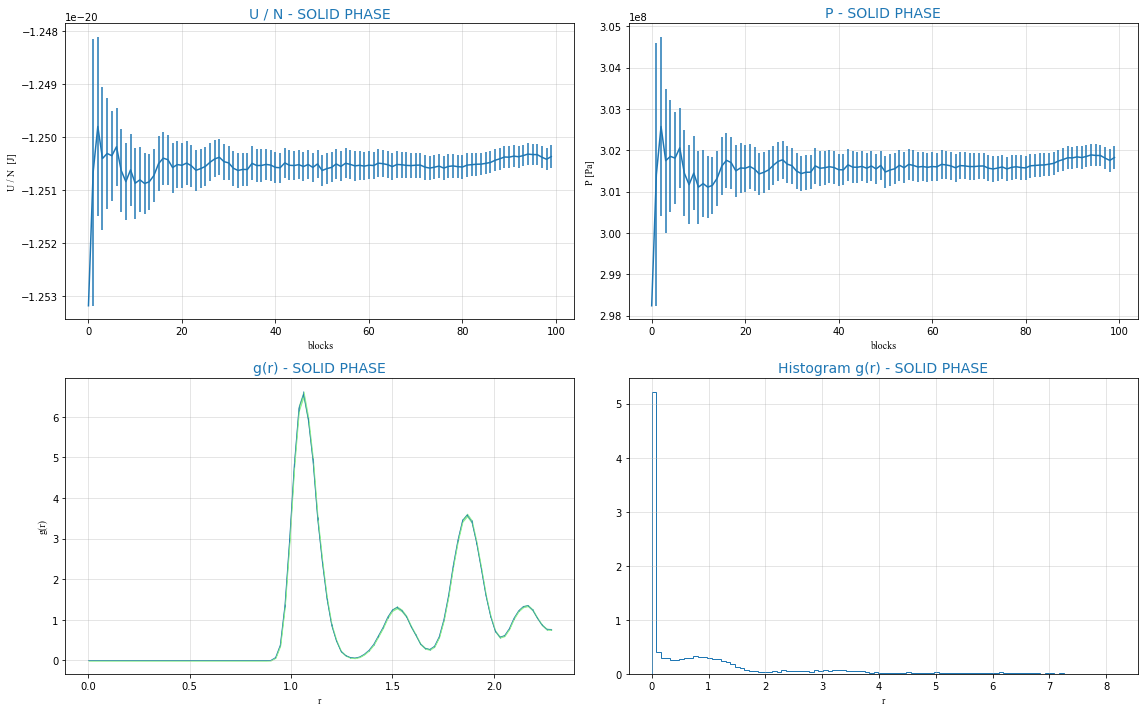

In [19]:
u_s = np.loadtxt(fname='Lecture07/Esercizio3/01solid/output.epot.0',usecols=2)*epsilon
err_u_s = np.loadtxt(fname='Lecture07/Esercizio3/01solid/output.epot.0',usecols=3)*epsilon

p_s = np.loadtxt(fname='Lecture07/Esercizio3/01solid/output.pres.0',usecols=2)*(epsilon/sigma**3)
err_p_s = np.loadtxt(fname='Lecture07/Esercizio3/01solid/output.pres.0',usecols=3)*(epsilon/sigma**3)

r_s = np.loadtxt(fname='Lecture07/Esercizio3/01solid/output.gave.0',usecols=0)
gav_s = np.loadtxt(fname='Lecture07/Esercizio3/01solid/output.gave.0',usecols=1)
err_gav_s = np.loadtxt(fname='Lecture07/Esercizio3/01solid/output.gave.0',usecols=2)

g_s = np.loadtxt(fname='Lecture07/Esercizio3/01solid/output.gofr.0')

graph(u_s, err_u_s, p_s, err_p_s, r_s,gav_s, err_gav_s, g_s,'SOLID PHASE')

In [20]:
print('< U / N > = ',u_s[99],' +/- ',err_u_s[99])
print('< P > = ',p_s[99],' +/- ',err_p_s[99])

< U / N > =  -1.2503672120963519e-20  +/-  2.0872920455064e-24
< P > =  301823772.2284861  +/-  276271.4804543554


## <font face = "Tahoma" style="color:teal"><b>Argon - fase liquida:</b></font>

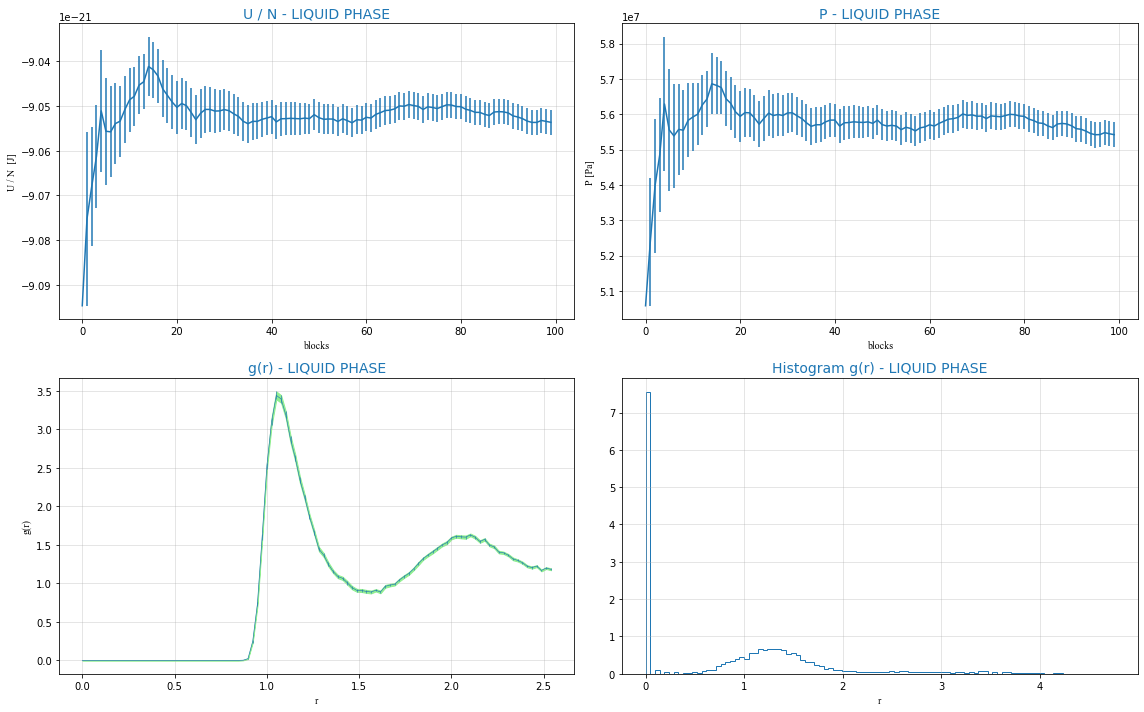

In [21]:
u_l = np.loadtxt(fname='Lecture07/Esercizio3/02liquid/output.epot.0',usecols=2)*epsilon
err_u_l = np.loadtxt(fname='Lecture07/Esercizio3/02liquid/output.epot.0',usecols=3)*epsilon

p_l = np.loadtxt(fname='Lecture07/Esercizio3/02liquid/output.pres.0',usecols=2)*(epsilon/sigma**3)
err_p_l = np.loadtxt(fname='Lecture07/Esercizio3/02liquid/output.pres.0',usecols=3)*(epsilon/sigma**3)

r_l = np.loadtxt(fname='Lecture07/Esercizio3/02liquid/output.gave.0',usecols=0)
gav_l = np.loadtxt(fname='Lecture07/Esercizio3/02liquid/output.gave.0',usecols=1)
err_gav_l = np.loadtxt(fname='Lecture07/Esercizio3/02liquid/output.gave.0',usecols=2)

g_l = np.loadtxt(fname='Lecture07/Esercizio3/02liquid/output.gofr.0')

graph(u_l, err_u_l, p_l, err_p_l, r_l, gav_l, err_gav_l, g_l,'LIQUID PHASE')

In [22]:
print('< U / N > = ',u_l[99],' +/- ',err_u_l[99])
print('< P > = ',p_l[99],' +/- ',err_p_l[99])

< U / N > =  -9.053663418434879e-21  +/-  2.7485785058337598e-24
< P > =  55421617.43752314  +/-  353177.6677642733


## <font face = "Tahoma" style="color:teal"><b>Argon - fase gassosa:</b></font>

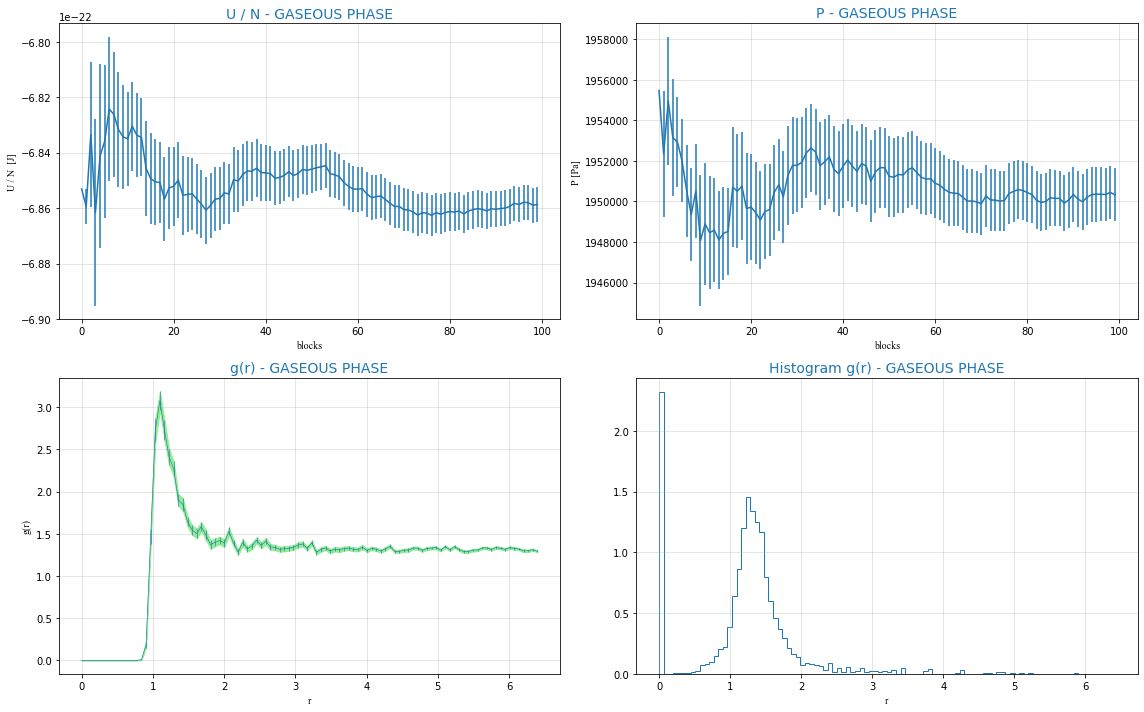

In [23]:
u_g = np.loadtxt(fname='Lecture07/Esercizio3/03Gas/output.epot.0',usecols=2)*epsilon
err_u_g = np.loadtxt(fname='Lecture07/Esercizio3/03Gas/output.epot.0',usecols=3)*epsilon

p_g = np.loadtxt(fname='Lecture07/Esercizio3/03Gas/output.pres.0',usecols=2)*(epsilon/sigma**3)
err_p_g = np.loadtxt(fname='Lecture07/Esercizio3/03Gas/output.pres.0',usecols=3)*(epsilon/sigma**3)

r_g = np.loadtxt(fname='Lecture07/Esercizio3/03Gas/output.gave.0',usecols=0)
gav_g = np.loadtxt(fname='Lecture07/Esercizio3/03Gas/output.gave.0',usecols=1)
err_gav_g = np.loadtxt(fname='Lecture07/Esercizio3/03Gas/output.gave.0',usecols=2)

g_g = np.loadtxt(fname='Lecture07/Esercizio3/03Gas/output.gofr.0')

graph(u_g, err_u_g, p_g, err_p_g, r_g, gav_g, err_gav_g, g_g,'GASEOUS PHASE')

In [24]:
print('< U / N > = ',u_g[99],' +/- ',err_u_g[99])
print('< P > = ',p_g[99],' +/- ',err_p_g[99])

< U / N > =  -6.85869735615072e-22  +/-  6.224018754100799e-25
< P > =  1950327.5181097568  +/-  1309.301466355542
